In [2]:
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt 

from os import listdir
from os.path import isfile, join

In [3]:
outliers = pd.read_csv("Data/FE_outliers_round1_29param.csv")

In [4]:
repeat = pd.read_csv("Data/FE_repeatRound2_29param.csv")

In [5]:
df_total = pd.concat([outliers, repeat 
                       ], axis = 0, ignore_index = True)
df_total.keys()

Index(['Number_pieces', 'Length_ratio', 'angle1_9p', 'angle2_9', 'angle3_9p',
       'angle4_9p', 'angle1_25p', 'angle2_25p', 'angle3_25p', 'angle4_25p',
       'angle5_25p', 'angle6_25p', 'angle1_49p', 'angle2_49p', 'angle3_49p',
       'angle4_49p', 'angle5_49p', 'angle6_49p', 'angle7_49p', 'angle8_49p',
       'Safety_factor', 'Oop_deform', 'Tot_contactEngy', 'Elast_strainEngy',
       'Edge_temp', 'Avr_frictForce', 'HeatRate', 'IntEngy', 'FricDissipRate'],
      dtype='object')

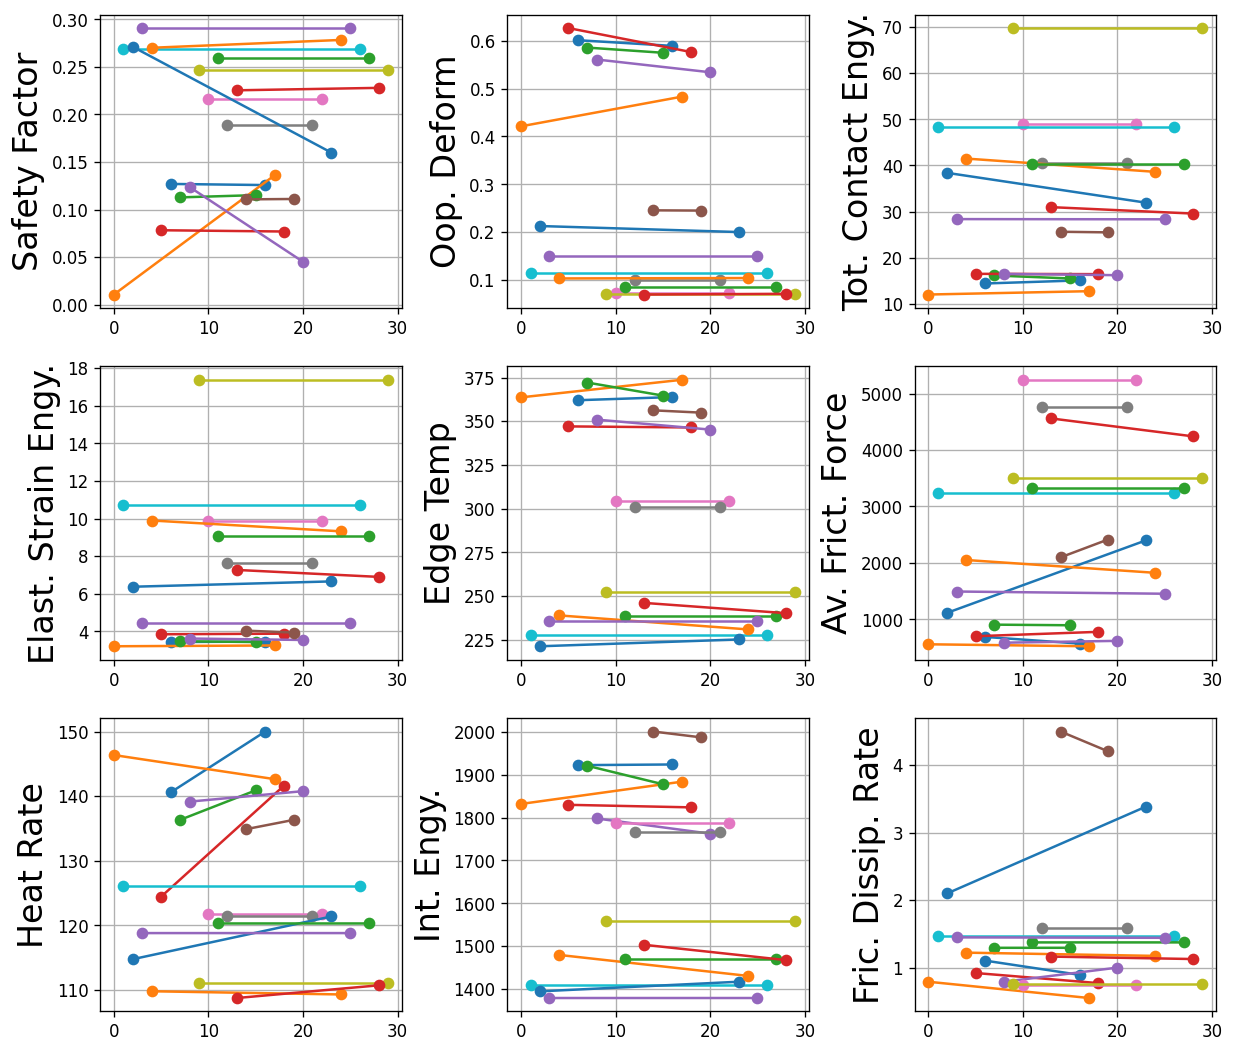

In [32]:
fig, axes = plt.subplots(dpi = 120,nrows = 3, ncols = 3,figsize=(12, 11))

plt.subplots_adjust(hspace = 0.2, wspace=0.35)  #determines the distance between two rows of plots

"""flattens the ax variable, if we don't do that we can not put it in the for loop."""
ax = axes.ravel() 


grouped_df = df_total.groupby(['Number_pieces', 'Length_ratio','angle1_9p', 'angle2_9', 'angle3_9p', 'angle4_9p'
                               ,'angle1_25p', 'angle2_25p', 'angle3_25p',
                               'angle4_25p','angle5_25p', 'angle6_25p','angle1_49p', 'angle2_49p',
                               'angle3_49p','angle4_49p','angle5_49p', 'angle6_49p', 'angle7_49p',
                               'angle8_49p'
                              ], as_index=False)


for key, item in grouped_df:
    x1 = grouped_df.get_group(key).Safety_factor
    x2 = grouped_df.get_group(key).Oop_deform
    x3 = grouped_df.get_group(key).Tot_contactEngy
    x4 = grouped_df.get_group(key).Elast_strainEngy
    x5 = grouped_df.get_group(key).Edge_temp
    x6 = grouped_df.get_group(key).Avr_frictForce
    x7 = grouped_df.get_group(key).HeatRate
    x8 = grouped_df.get_group(key).IntEngy
    x9 = grouped_df.get_group(key).FricDissipRate

    ax[0].plot(x1, label=str(key), marker='o')
    ax[0].set_ylabel('Safety Factor', fontsize=20)


    ax[1].plot(x2, label=str(key), marker='o')
    ax[1].set_ylabel('Oop. Deform', fontsize=20)
    
    ax[2].plot(x3, label=str(key), marker='o')
    ax[2].set_ylabel('Tot. Contact Engy.', fontsize=20)
    
    ax[3].plot(x4, label=str(key), marker='o')
    ax[3].set_ylabel('Elast. Strain Engy.', fontsize=20)
    
    ax[4].plot(x5, label=str(key), marker='o')
    ax[4].set_ylabel('Edge Temp', fontsize=20)
        
    ax[5].plot(x6, label=str(key), marker='o')
    ax[5].set_ylabel('Av. Frict. Force', fontsize=20)
    
    ax[6].plot(x7, label=str(key), marker='o')
    ax[6].set_ylabel('Heat Rate', fontsize=20)
    
    ax[7].plot(x8, label=str(key), marker='o')
    ax[7].set_ylabel('Int. Engy.', fontsize=20)
    
    ax[8].plot(x9, label=str(key), marker='o')
    ax[8].set_ylabel('Fric. Dissip. Rate', fontsize=20)
    
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()
ax[6].grid()
ax[7].grid()
ax[8].grid()
ax[7].set_xlabel('Intdex in dataset', fontsize=20)
plt.savefig('CleanGraphs/repeat_check.png',bbox_inches='tight')
plt.show()

In [45]:
df_total.iloc[0,:6]

Number_pieces     9.0
Length_ratio      0.5
angle1_9p         5.0
angle2_9         25.0
angle3_9p        25.0
angle4_9p        10.0
Name: 0, dtype: float64

In [56]:
df_total.iloc[2,:2], df_total.iloc[2,12:20]

(Number_pieces    49.0
 Length_ratio      1.0
 Name: 2, dtype: float64,
 angle1_49p    15.0
 angle2_49p    10.0
 angle3_49p    15.0
 angle4_49p    10.0
 angle5_49p    20.0
 angle6_49p     5.0
 angle7_49p     5.0
 angle8_49p    15.0
 Name: 2, dtype: float64)

In [52]:
df_total.iloc[5,:6]

Number_pieces     9.00
Length_ratio      0.75
angle1_9p         5.00
angle2_9         25.00
angle3_9p        15.00
angle4_9p        10.00
Name: 5, dtype: float64

In [53]:
df_total.iloc[8,:6]

Number_pieces     9.00
Length_ratio      0.75
angle1_9p         5.00
angle2_9         25.00
angle3_9p        25.00
angle4_9p        10.00
Name: 8, dtype: float64

In [54]:
df_total.iloc[19,:6]

Number_pieces     9.0
Length_ratio      1.5
angle1_9p        10.0
angle2_9         10.0
angle3_9p        10.0
angle4_9p        10.0
Name: 19, dtype: float64